In [1]:
import os
import json
import glob
import pandas as pd
import pyarrow as pa
import pyarrow.parquet as pq
from datetime import datetime

Este notebook es la continuación de los datos transformados/explorados en el archivo 'holidayinn.ipynb', el objetivo es leer los datos resultantes y quedarme con los estados con sucursales de la cadena.

In [2]:
def find_files(directory_path):
    files_with_data = []

    for filename in os.listdir(directory_path):
        if filename.endswith(".parquet"):
            file_path = os.path.join(directory_path, filename)
            try:
                df = pd.read_parquet(file_path)
                #verificar si tiene registros el df, si no los tiene continua al siguiente archivo .parquet
                if not df.empty:
                    files_with_data.append(filename)
            except pd.errors.EmptyDataError:
                pass 

    return files_with_data


In [3]:
states = find_files(directory_path="../reviews-estados/HolidayInn-Review/")
states

['review-Alabama.parquet',
 'review-Arizona.parquet',
 'review-California.parquet',
 'review-Colorado.parquet',
 'review-District_of_Columbia.parquet',
 'review-Florida.parquet',
 'review-Georgia.parquet',
 'review-Illinois.parquet',
 'review-Indiana.parquet',
 'review-Maryland.parquet',
 'review-Michigan.parquet',
 'review-Minnesota.parquet',
 'review-Mississippi.parquet',
 'review-Montana.parquet',
 'review-Nebraska.parquet',
 'review-New_Mexico.parquet',
 'review-New_York.parquet',
 'review-North_Carolina.parquet',
 'review-Ohio.parquet',
 'review-Oregon.parquet',
 'review-Pennsylvania.parquet',
 'review-South_Carolina.parquet',
 'review-Texas.parquet',
 'review-Virginia.parquet',
 'review-Washington.parquet']

Elimino los archivos en los cuales no hay información sobre HolidayInn

In [4]:
for filename in os.listdir("../reviews-estados/HolidayInn-Review/"):
    file_path = os.path.join("../reviews-estados/HolidayInn-Review/", filename)
    if filename not in states:
        os.remove(file_path)
        print(f"Archivo eliminado: {filename}")

Voy a llamar a estos 24 archivos en dataframes distintos, para poder analizarlos.

In [5]:
def iterador_archivo(carpeta):
    dataframes = []
    
    for archivo in os.listdir(carpeta):
        ruta_archivo = os.path.join(carpeta, archivo)
        if os.path.isfile(ruta_archivo) and archivo.endswith('.parquet'):
            df = pd.read_parquet(ruta_archivo)
            df['nombre_archivo'] = archivo
            df['state'] = archivo.split('.')[0] 
            dataframes.append(df)
    
    df_combinado = pd.concat(dataframes, axis=0, ignore_index=True)
    return df_combinado

In [6]:
all_data = iterador_archivo('../reviews-estados/HolidayInn-Review/')

Disponibilice estos datos en un nuevo archivo.

In [7]:
data = pd.read_parquet('./holiday_all_states')

In [8]:
data

,user_id,name,time,rating,text,pics,resp,gmap_id,nombre_archivo,state
0,112665186528292597385,Charlie Cline,2016-02-07 04:58:14.934000+00:00,4,Good location. Nice staff. Clean. Breakfast ar...,None,None,0x88890491e9416625:0x2f85307a06ddb16,review-Alabama.parquet,review-Alabama
1,108637957038201408174,Jennifer Passmore,2017-04-12 03:04:16.419000+00:00,5,Super clean very friendly,None,None,0x88890491e9416625:0x2f85307a06ddb16,review-Alabama.parquet,review-Alabama
2,109079098695645726629,TheBeckyboo926,2016-10-15 01:14:34.021000+00:00,5,Amazing! We had a conference room and it was a...,None,None,0x88890491e9416625:0x2f85307a06ddb16,review-Alabama.parquet,review-Alabama
3,117088716850554427602,yolanda arellano,2016-11-14 14:12:46.153000+00:00,3,A bit on the pricey side but they take on pets...,None,None,0x88890491e9416625:0x2f85307a06ddb16,review-Alabama.parquet,review-Alabama
4,117028379331677388352,Greg Randall,2016-05-28 18:39:33.963000+00:00,4,Solid hotel. Staff was friendly. Room was clean.,None,None,0x88890491e9416625:0x2f85307a06ddb16,review-Alabama.parquet,review-Alabama
...,...,...,...,...,...,...,...,...,...,...
1790,105795008554715307308,Mike Coates,2018-01-18 07:36:05.228000+00:00,3,None,None,None,0x5490112537f789dd:0x2e07222ed9e353d8,review-Washington.parquet,review-Washington
1791,110779513713475018373,Sadie Whitener,2018-11-05 16:59:28.344000+00:00,4,None,None,None,0x5490112537f789dd:0x2e07222ed9e353d8,review-Washington.parquet,review-Washington
1792,117261844917157124247,AJ Cox,2016-12-16 12:03:51.446000+00:00,5,None,None,None,0x5490112537f789dd:0x2e07222ed9e353d8,review-Washington.parquet,review-Washington
1793,112699397651929368731,xanvavy,2019-11-14 09:33:36.071000+00:00,5,None,None,None,0x5490112537f789dd:0x2e07222ed9e353d8,review-Washington.parquet,review-Washington


El promedio de rating de todas las reviews existentes de HolidayInn en el dataset de Google:

In [9]:
data['rating'].mean()

4.09025069637883

Cantidad de reviews de todas las sucursales de todos los estados:

In [10]:
data['text'].count()

1204

Cantidad de respuestas por parte de las sucursales:

In [11]:
data['resp'].count()

181

In [63]:
colorado = data[data['state'] == 'review-Colorado']
colorado


,user_id,name,time,rating,text,pics,resp,gmap_id,nombre_archivo,state
216,111955965217327851102,Richie Guzior,2018-09-16 13:35:10.493000+00:00,4,Nice and close to the airport. Typical room an...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x876c65c13891cd39:0xf3effbcfe2a135cc,review-Colorado.parquet,review-Colorado
217,100846688994490223147,Doctor Benway,2018-10-08 13:34:45.438000+00:00,5,Excellent hotel close to the airport.\nThey ha...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x876c65c13891cd39:0xf3effbcfe2a135cc,review-Colorado.parquet,review-Colorado
218,101758332437742345487,James Pruitt,2018-01-28 17:51:38.714000+00:00,5,Once again a great stay before & after an inte...,[{'url': ['https://lh5.googleusercontent.com/p...,"{'text': 'Good Afternoon James, Thank you for ...",0x876c65c13891cd39:0xf3effbcfe2a135cc,review-Colorado.parquet,review-Colorado
219,115234599941827931848,Chad Reynolds,2020-03-11 03:45:16.158000+00:00,5,Beautiful hotel and amazing staff. Very plea...,[{'url': ['https://lh5.googleusercontent.com/p...,None,0x876c65c13891cd39:0xf3effbcfe2a135cc,review-Colorado.parquet,review-Colorado
220,109229797386132459831,Tracey Hovey,2020-02-08 14:37:05.649000+00:00,2,Amethyst was amazing at check in! She was supe...,None,None,0x876c65c13891cd39:0xf3effbcfe2a135cc,review-Colorado.parquet,review-Colorado
...,...,...,...,...,...,...,...,...,...,...
419,110428785154150805444,Bob Kinney,2016-06-05 04:13:17.228000+00:00,4,"Comfortable beds, but the lack of AC is a bumm...",None,None,0x874047cc33639b03:0x6234075e91b26982,review-Colorado.parquet,review-Colorado
420,115883994144470804666,Sam Hall,2016-08-02 22:10:27.174000+00:00,1,Horrible. Holiday Inn is dropping them at the...,None,None,0x874047cc33639b03:0x6234075e91b26982,review-Colorado.parquet,review-Colorado
421,116126778625405035645,Mike Valenkas,2016-09-04 21:12:03.793000+00:00,5,Great location. Right next to shuttles,None,None,0x874047cc33639b03:0x6234075e91b26982,review-Colorado.parquet,review-Colorado
422,116831313812448800503,Crystal Williams,2016-09-04 04:48:29.304000+00:00,5,"Friendly, cute room, heated pool was great",None,None,0x874047cc33639b03:0x6234075e91b26982,review-Colorado.parquet,review-Colorado


In [60]:
def count_rating(df):
    grouped = df.groupby('gmap_id')
    rating_counts = grouped['rating'].count()
    unique_gmap_ids = rating_counts.index
    
    for gmap_id in unique_gmap_ids:
        count = rating_counts[gmap_id]
        print(f'gmap_id: {gmap_id}, cantidad de valores en rating: {count}')


In [61]:
count_rating(data)

gmap_id: 0x52a551699ee295c3:0x5859e835850e6dfa, cantidad de valores en rating: 155
gmap_id: 0x5343552286e41acd:0x9e06f90d768932f2, cantidad de valores en rating: 19
gmap_id: 0x5490112537f789dd:0x2e07222ed9e353d8, cantidad de valores en rating: 240
gmap_id: 0x54cf7a04fc5cacc5:0x71e398b5a78896ee, cantidad de valores en rating: 97
gmap_id: 0x80945e9ee44555b9:0xaf7f677f14c0ba1d, cantidad de valores en rating: 3
gmap_id: 0x80dca626078e4435:0x2a9aa179d6174e5d, cantidad de valores en rating: 8
gmap_id: 0x864e7cc519b4c063:0x284c6f1ba99b7d89, cantidad de valores en rating: 41
gmap_id: 0x86e26efc3d25979f:0x670ed17e7155ceaa, cantidad de valores en rating: 8
gmap_id: 0x86fb8e0c88db23c7:0xa88d2fef13de646e, cantidad de valores en rating: 13
gmap_id: 0x8728c9d8a1b770d5:0x3e71a34dfa1e2800, cantidad de valores en rating: 54
gmap_id: 0x872a3e85854eb0c9:0x4e944fd842f0ad12, cantidad de valores en rating: 9
gmap_id: 0x874047cc33639b03:0x6234075e91b26982, cantidad de valores en rating: 13
gmap_id: 0x876c65c

Corroboro el promedio min y max de todo el rating por sucursal

In [57]:
def avg_rating(df):
    all_avg = df.groupby('gmap_id')['rating'].mean()
    ranking = all_avg.sort_values(ascending=False)
    print('menor promedio rating:', ranking.min())
    print('mayor promedio rating:', ranking.max())

In [58]:
avg_rating(data)

menor promedio rating: 2.7777777777777777
mayor promedio rating: 4.833333333333333


Traigo los id de aquellas sucursales que han respondido los reviews y la cantidad respuestas por cada una.

In [53]:
def resp(df):
    filter_resp = df.dropna(subset=['resp'])
    ranking_count = filter_resp.groupby('gmap_id').agg({'resp': 'count', 'state': 'first'})
    ranking = ranking_count.sort_values(by='resp', ascending=False)

    print(ranking)

In [54]:
resp(data)

                                       resp              state
gmap_id                                                       
0x876c65c13891cd39:0xf3effbcfe2a135cc    73    review-Colorado
0x8831a506acba0ad9:0x1cd05dee91da747e    31        review-Ohio
0x89b5c3ebad596913:0xe94cc8d48651e9e8    31    review-Virginia
0x5490112537f789dd:0x2e07222ed9e353d8    17  review-Washington
0x8728c9d8a1b770d5:0x3e71a34dfa1e2800    12     review-Arizona
0x89c2877930f404cd:0xe88f518a413d6729     9    review-New_York
0x888eb880384f40a5:0x734d06fd0a09ee57     4     review-Alabama
0x5343552286e41acd:0x9e06f90d768932f2     2     review-Montana
0x89b637ff613de4cd:0x8174b26d6c30fb36     1    review-Virginia
0x89b7c473b381b9ff:0x39d26a8e0444fed3     1    review-Maryland


Para calcular el indice de respuesta: (reviews totales / respuestas totales)

In [168]:
def porcentaje_respuesta(total_reviews, total_respuestas):
    if total_reviews == 0:
        return 0
    return (total_respuestas / total_reviews) * 100

Para tener mayor claridad sobre los datos totales, voy a iterar sobre cada ID unica y reunir los datos en un solo dataframe.

In [176]:
def data_state(state):
    results = []
    grouped = state.groupby("gmap_id")
    for palabra in state:
        state['state'] = state['state'].str.replace('review-', '')
    
    for gmap_id, group_data in grouped:
        av_rating_state = group_data["rating"].mean()
        review_count = group_data['rating'].count()
        resp_count = group_data['resp'].count()
        state_name = group_data['state'].iloc[0]
        avg = porcentaje_respuesta(review_count, resp_count)
        
        results.append([gmap_id, state_name, av_rating_state, review_count, resp_count, avg])
    
    result_df = pd.DataFrame(results, columns=['gmap_id', 'state', 'avg_rating', 'review_count', 'resp_count', 'indice_resp'])
    result_df = result_df.sort_values(by='avg_rating', ascending=False)
    return result_df



In [179]:
df_indice = data_state(data)
df_indice

,gmap_id,state,avg_rating,review_count,resp_count,indice_resp
28,0x88dd7dafbda83fc3:0x86e745e6f195ca69,Florida,4.833333,12,0,0.000000
21,0x88569c8bcfa968cf:0xe571b6b916b80480,North_Carolina,4.571429,14,0,0.000000
7,0x86e26efc3d25979f:0x670ed17e7155ceaa,New_Mexico,4.500000,8,0,0.000000
10,0x872a3e85854eb0c9:0x4e944fd842f0ad12,Arizona,4.444444,9,0,0.000000
13,0x8776c2790bfa7ffd:0x7b3bc3df38f06534,Nebraska,4.400000,15,0,0.000000
27,0x888eb880384f40a5:0x734d06fd0a09ee57,Alabama,4.392857,28,4,14.285714
41,0x89c698a0875f83bf:0x6ecf8a65960b28,Pennsylvania,4.375000,32,0,0.000000
9,0x8728c9d8a1b770d5:0x3e71a34dfa1e2800,Arizona,4.351852,54,12,22.222222
32,0x88f5ac62bc6f21cb:0x5ae7bf2041b49721,Georgia,4.333333,45,0,0.000000
0,0x52a551699ee295c3:0x5859e835850e6dfa,Minnesota,4.322581,155,0,0.000000


Analisis de reseñas positivas:

In [203]:
positive_reviews = df_indice[df_indice['avg_rating'] >= 3.5]
proportion_positive = len(positive_reviews) / len(df_indice)

print(f"Proporcion Reseñas Positivas: {proportion_positive:.2%}")

Proporcion Reseñas Positivas: 84.44%


Distribucion de calificaciones promedio:

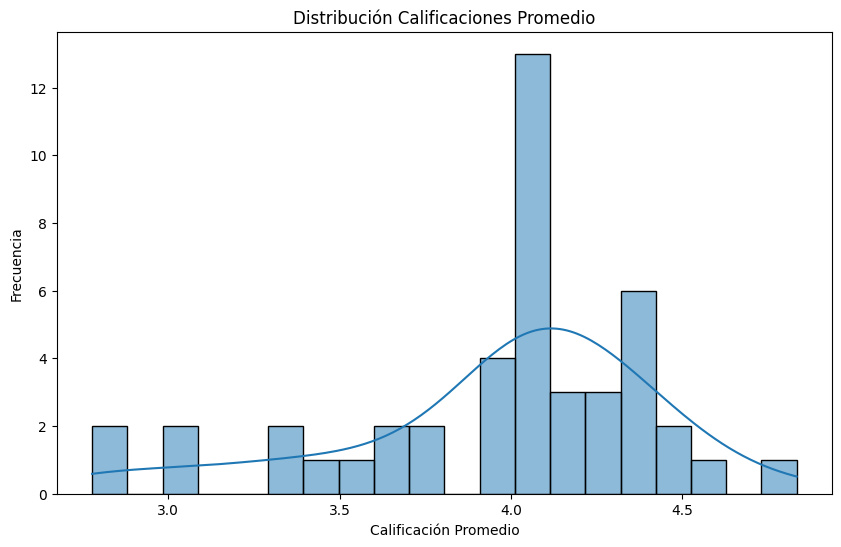

In [183]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df_indice, x='avg_rating', bins=20, kde=True)
plt.title('Distribución Calificaciones Promedio')
plt.xlabel('Calificación Promedio')
plt.ylabel('Frecuencia')
plt.show()

Relacion entre calificacion Promedio e Indice de respuesta por State

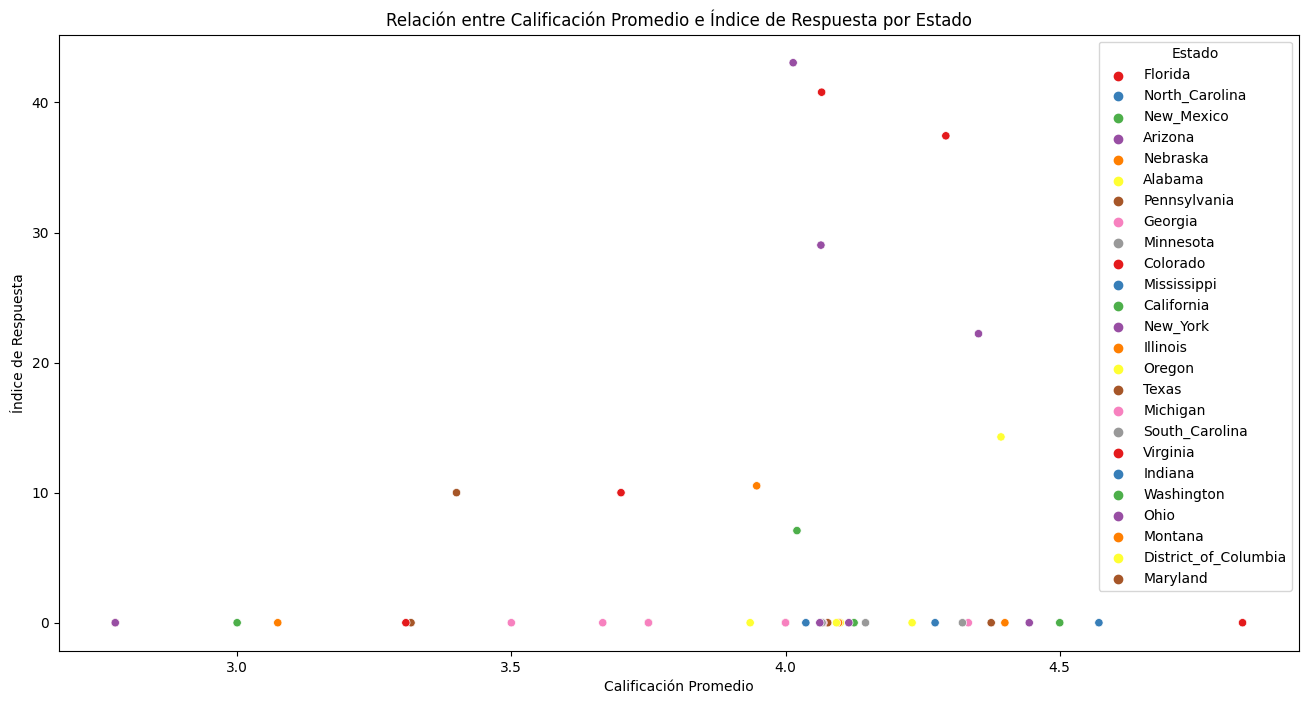

In [212]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df_indice, x='avg_rating', y='indice_resp', hue='state', palette='Set1')
plt.title('Relación entre Calificación Promedio e Indice de Respuesta por Estado')
plt.xlabel('Calificación Promedio')
plt.ylabel('Indice de Respuesta')
plt.legend(title='Estado')
plt.show()

state vs calificación promedio

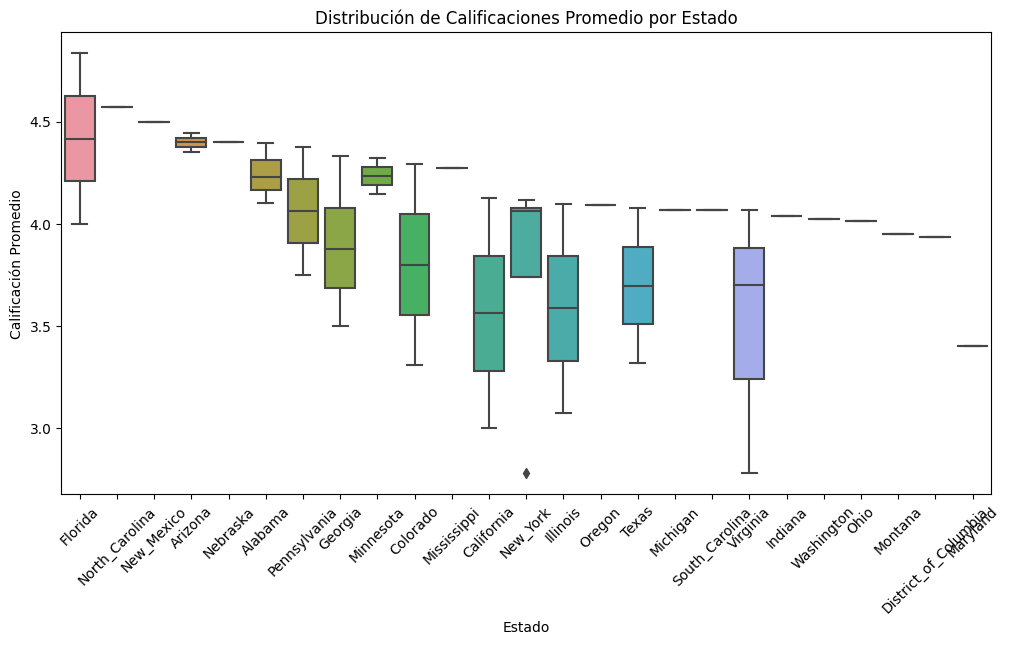

In [186]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_indice, x='state', y='avg_rating')
plt.title('Distribución de Calificaciones Promedio por Estado')
plt.xlabel('Estado')
plt.ylabel('Calificación Promedio')
plt.xticks(rotation=45)
plt.show()

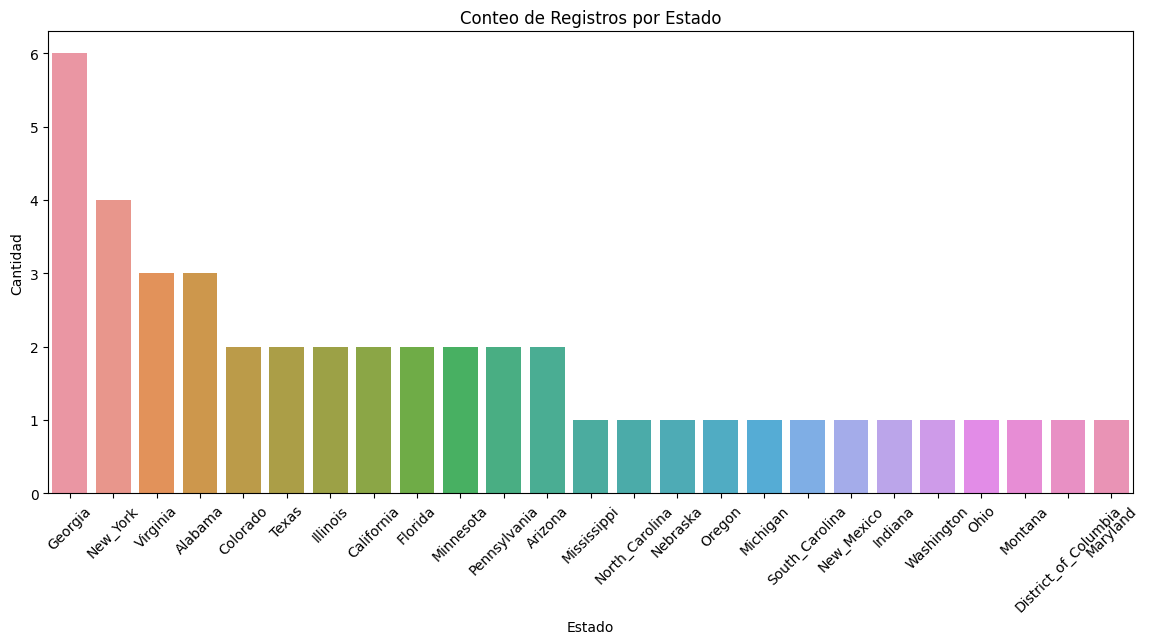

Proporción de Respuestas: 10.08%


In [202]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df_indice, x='state', order=df_indice['state'].value_counts().index)
plt.title('Conteo de Registros por Estado')
plt.xlabel('Estado')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

total_respuestas = df_indice['resp_count'].sum()
total_reviews = df_indice['review_count'].sum()
proporcion_respuestas = total_respuestas / total_reviews

print(f"Proporción de Respuestas: {proporcion_respuestas:.2%}")

Nube de palabras más destacadas del primer dataframe.

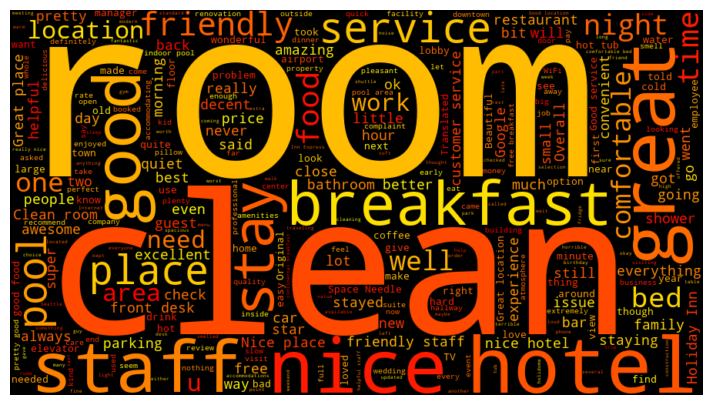

In [236]:
from wordcloud import WordCloud

filtered_text = data["text"].dropna().astype(str)
filtered_text = " ".join(review for review in filtered_text)

wc = WordCloud(background_color="black", max_words=300, width=900, height=500, colormap="autumn")
wc.generate(filtered_text)

plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()